In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

shape_path = 'cb_2018_us_state_20m.shp'

shape = gpd.read_file(shape_path)
print(shape.head())

  STATEFP   STATENS     AFFGEOID GEOID STUSPS          NAME LSAD  \
0      24  01714934  0400000US24    24     MD      Maryland   00   
1      19  01779785  0400000US19    19     IA          Iowa   00   
2      10  01779781  0400000US10    10     DE      Delaware   00   
3      39  01085497  0400000US39    39     OH          Ohio   00   
4      42  01779798  0400000US42    42     PA  Pennsylvania   00   

          ALAND       AWATER  \
0   25151100280   6979966958   
1  144661267977   1084180812   
2    5045925646   1399985648   
3  105828882568  10268850702   
4  115884442321   3394589990   

                                            geometry  
0  MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ...  
1  POLYGON ((-96.62187 42.77925, -96.57794 42.827...  
2  POLYGON ((-75.77379 39.72220, -75.75323 39.757...  
3  MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ...  
4  POLYGON ((-80.51989 40.90666, -80.51964 40.987...  


In [2]:
shape = shape.dropna()
shape = shape[~shape['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico'])]

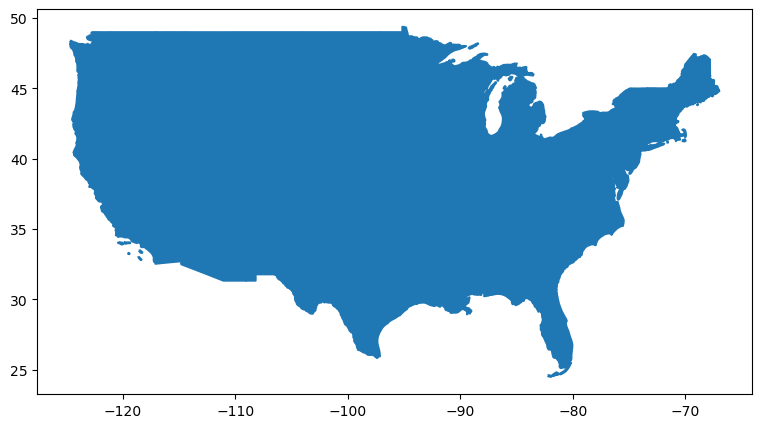

In [3]:
ax = shape.boundary.plot(figsize=(10, 5))
shape.plot(ax=ax, legend=True)

plt.show()

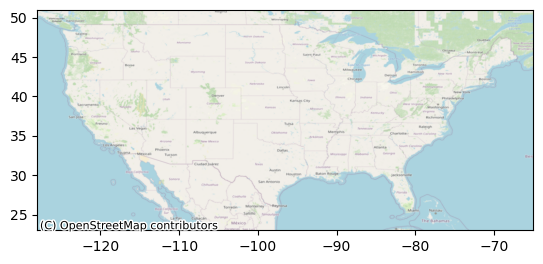

In [21]:
import geopandas as gpd
import contextily as cx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as pa
from matplotlib.lines import Line2D

long_min = - 128
long_max = -65
lat_min = 23
lat_max = 51

#collecte de la dataframe...
df = pd.read_csv('test_data.csv', parse_dates = ["Opening_date", "Closing_date"])
df = df[['Latitude', 'Longitude', 'State']]
df.head()

#conversion en geodataframe
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs='EPSG:4326')

#création des couleurs/tailles de points
def couleur(a): # couleur d'un point du graphique en fonction de a la date du séisme en km
    if a == "opened":
        return 'purple'
    elif a == "closed":
        return 'blue'
    elif a == "opened-closed":
        return 'green'
    return 'yellow'

vcouleur = np.vectorize(couleur)

color=vcouleur(df['State'])

fig, ax = plt.subplots() #gdf.plot(kind='scatter', y='Latitude', x='Longitude', s=magn_2, c=prof, edgecolors='k', linewidth = 0.6)
ax.set_xlim(long_min, long_max)
ax.set_ylim(lat_min, lat_max)
cx.add_basemap(ax, crs = gdf.crs, source=cx.providers.OpenStreetMap.Mapnik) #OpenStreetMap.Mapnik

line1 = Line2D(range(1), range(1), color="purple", marker='o', markerfacecolor="purple")
line2 = Line2D(range(1), range(1), color="blue", marker='o',markerfacecolor="blue")
line3 = Line2D(range(1), range(1), color="cyan", marker='o', markerfacecolor="cyan")
line4 = Line2D(range(1), range(1), color="green", marker='o',markerfacecolor="green")
line5 = Line2D(range(1), range(1), color="yellow", marker='o',markerfacecolor="yellow")
#plt.legend((line1,line2,line3,line4, line5),('< 2 km', '2-4 km', '4-6 km', '6-8 km', '8-10 km'),numpoints=1, loc='lower right',title = 'Profondeur',borderpad = 0.5, labelspacing = 0.5)

plt.show()

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as pa
from matplotlib.lines import Line2D

long_min = - 128
long_max = -65
lat_min = 23
long_max = 51

#collecte de la dataframe...
df = pd.read_csv('test_data.csv', parse_dates = ["Opening_date", "Closing_date"])

df.head()

Store_id State        Town              Street             Category  \
0      1158    AL  Adamsville  2473 Hackworth Rd.  Walmart Supercenter   

  Opening_date Closing_date   Latitude   Longitude      State  
0   1988-03-01          NaT   33.60094   -86.95611   "opened"

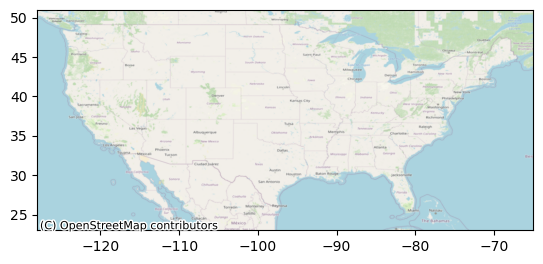

In [22]:
import geopandas as gpd
import contextily as cx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as pa
from matplotlib.lines import Line2D

long_min = - 128
long_max = -65
lat_min = 23
lat_max = 51

#collecte de la dataframe...
df = pd.read_csv('test_data.csv', parse_dates = ["Opening_date", "Closing_date"])
df = df[['Latitude', 'Longitude', 'State']]
df.head()

#conversion en geodataframe
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs='EPSG:4326')

fig, ax = plt.subplots() #gdf.plot(kind='scatter', y='Latitude', x='Longitude', s=magn_2, c=prof, edgecolors='k', linewidth = 0.6)
ax.set_xlim(long_min, long_max)
ax.set_ylim(lat_min, lat_max)
cx.add_basemap(ax, crs = gdf.crs, source=cx.providers.OpenStreetMap.Mapnik) #OpenStreetMap.Mapnik

plt.show()